In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-07 22:24:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 298573 (292K) [text/plain]
Zapis do: `laptops.csv.1'

laptops.csv.1       100%[===================>] 291,58K  --.-KB/s     w 0,1s    

2024-10-07 22:24:53 (2,73 MB/s) - zapisano `laptops.csv.1' [298573/298573]



In [152]:
df = pd.read_csv('laptops.csv')

<Axes: xlabel='final_price', ylabel='Count'>

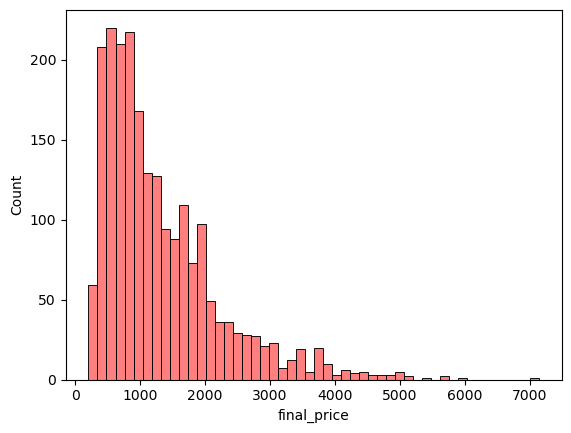

In [153]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
sns.histplot(df.final_price, bins=50, color='red', alpha=0.5)

In [154]:
# take only ram storage and price columns
df = df[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


**Q. 1**

In [155]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

**Q. 2**

In [156]:
df['ram'].median()

np.float64(16.0)

**Data preparation**

In [161]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


**Q. 3**

In [168]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# base = ['screen']


def prepare_X_zero(df):
    df_num = df
    df_num = df_num.fillna(0)
    print(df.isna().sum())
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df
    df_num['screen'] = df_num['screen'].fillna(df_num['screen'].median())
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [165]:
X_train_zero = prepare_X_zero(df_train)

w0, w = train_linear_regression(X_train_zero, y_train)

y_pred = w0 + X_train_zero.dot(w)

w0, w

ram        0
storage    0
screen     3
dtype: int64


(np.float64(6.727163706117667), array([ 0.02630589,  0.00066041, -0.03651909]))

np.float64(0.44632651855038796)

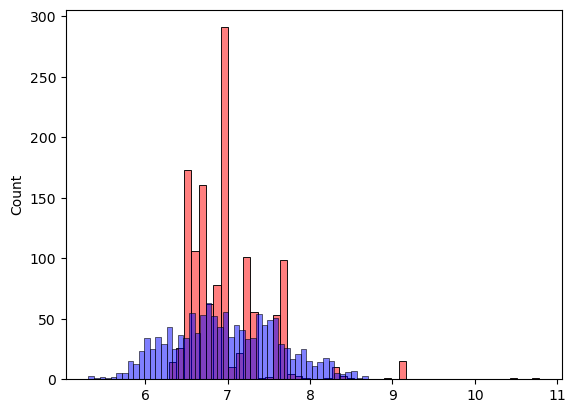

In [166]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
rmse(y_train, y_pred)

In [169]:
X_train_mean = prepare_X_mean(df_train)

w0, w = train_linear_regression(X_train_mean, y_train)

y_pred = w0 + X_train_mean.dot(w)

w0, w

ValueError: shapes (1296,) and (1,) not aligned: 1296 (dim 0) != 1 (dim 0)